In [1]:
from tensorflow.keras.datasets import mnist
(Xtr,ytr),(Xte,yte)=mnist.load_data()

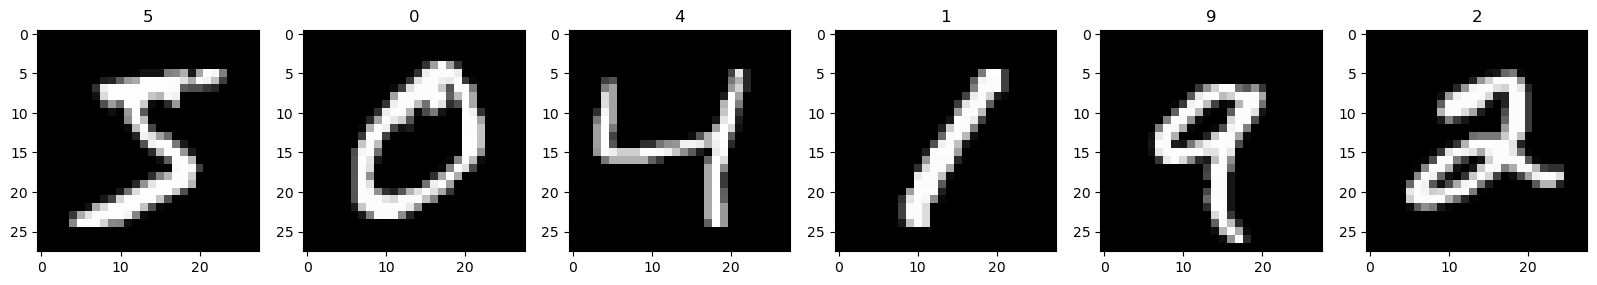

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np
fig=plt.figure(figsize=(20,20))
for i in range(6):
    ax=fig.add_subplot(1,6,i+1)
    ax.imshow(Xtr[i],cmap='gray')
    ax.set_title(str(ytr[i]))

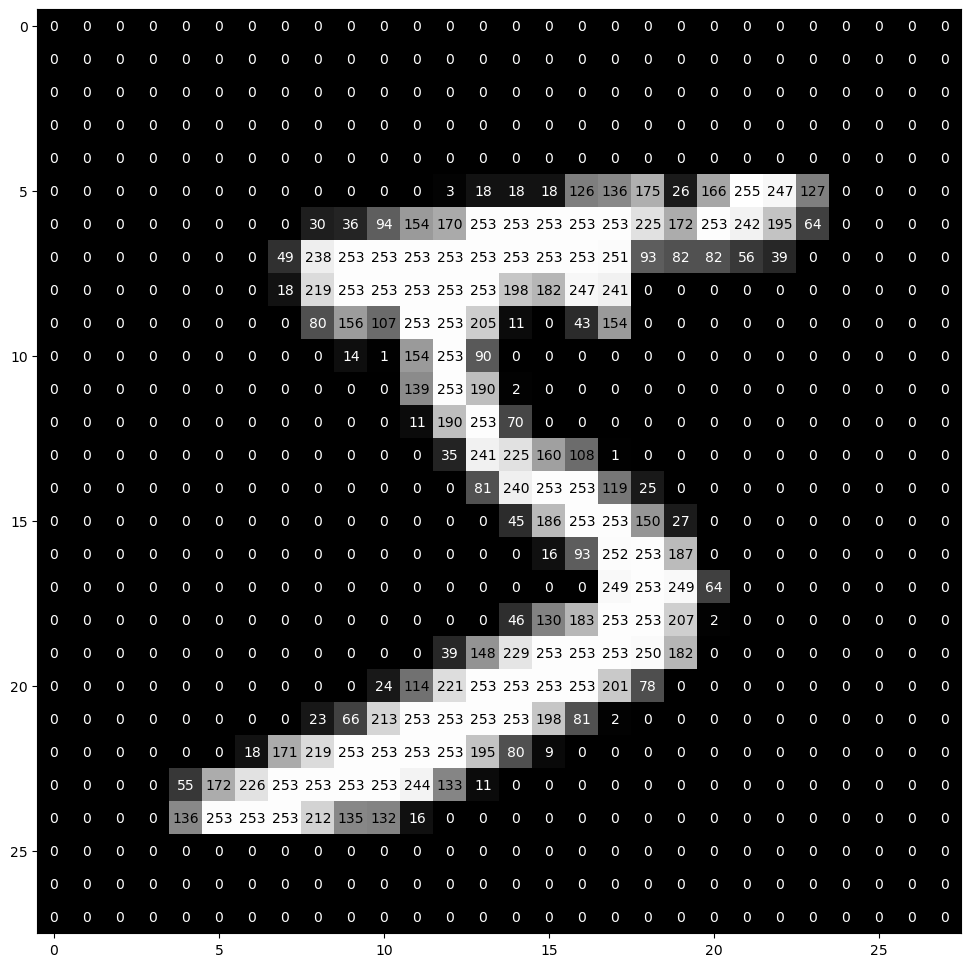

In [4]:
def visualize_input(img,ax):
    ax.imshow(img,cmap='gray')
    width,height=img.shape
    thresh=img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)),xy=(y,x),
                       horizontalalignment='center',
                       verticalalignment='center',
                       color='white' if img[x][y]<thresh else 'black')
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(111)
visualize_input(Xtr[0],ax)

In [5]:
Xtr=Xtr/255
Xte=Xte/255

In [8]:
print('X_train shape: ',Xtr.shape)
print(Xtr.shape[0],' Train samples')
print(Xte.shape[0],' Test samples')

X_train shape:  (60000, 28, 28)
60000  Train samples
10000  Test samples


In [9]:
from keras.utils import np_utils
num_classes=10
print('Integer-valued labels:')
print(ytr[:10])

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]


In [10]:
ytr=np_utils.to_categorical(ytr,num_classes)
yte=np_utils.to_categorical(yte,num_classes)
print('One-hot labels')
print(ytr[:10])

One-hot labels
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [11]:
img_rows,img_cols=28,28
Xtr=Xtr.reshape(Xtr.shape[0],img_rows,img_cols,1)
Xte=Xte.reshape(Xte.shape[0],img_rows,img_cols,1)
input_shape=(img_rows,img_cols,1)
print('input shape: ',input_shape)
print('X_train shape: ',Xtr.shape)

input shape:  (28, 28, 1)
X_train shape:  (60000, 28, 28, 1)


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,GlobalAveragePooling2D
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 64)                2

In [16]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])


In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpointer=ModelCheckpoint(filepath='model.weights.best.hdf5',verbose=1,save_best_only=True)
hist=model.fit(Xtr,ytr,batch_size=64,epochs=10,validation_data=(Xte,yte),callbacks=[checkpointer],verbose=2,shuffle=True)

Epoch 1/10

Epoch 1: val_loss improved from inf to 0.05342, saving model to model.weights.best.hdf5
938/938 - 20s - loss: 0.1680 - accuracy: 0.9469 - val_loss: 0.0534 - val_accuracy: 0.9813 - 20s/epoch - 21ms/step
Epoch 2/10

Epoch 2: val_loss improved from 0.05342 to 0.03943, saving model to model.weights.best.hdf5
938/938 - 18s - loss: 0.0477 - accuracy: 0.9856 - val_loss: 0.0394 - val_accuracy: 0.9865 - 18s/epoch - 19ms/step
Epoch 3/10

Epoch 3: val_loss improved from 0.03943 to 0.02973, saving model to model.weights.best.hdf5
938/938 - 19s - loss: 0.0332 - accuracy: 0.9898 - val_loss: 0.0297 - val_accuracy: 0.9903 - 19s/epoch - 21ms/step
Epoch 4/10

Epoch 4: val_loss improved from 0.02973 to 0.02403, saving model to model.weights.best.hdf5
938/938 - 20s - loss: 0.0249 - accuracy: 0.9924 - val_loss: 0.0240 - val_accuracy: 0.9921 - 20s/epoch - 21ms/step
Epoch 5/10

Epoch 5: val_loss did not improve from 0.02403
938/938 - 20s - loss: 0.0192 - accuracy: 0.9945 - val_loss: 0.0263 - val_

In [18]:
model.load_weights('model.weights.best.hdf5')

In [19]:
score=model.evaluate(Xte,yte,verbose=0)
accuracy=100*score[1]
print('Test accuracy: %.4f%%' %accuracy)

Test accuracy: 99.2100%


In [28]:
from tensorflow.keras.datasets import cifar10
(Xtr,ytr),(Xte,yte)=cifar10.load_data()

In [29]:
Xtr.shape

(50000, 32, 32, 3)

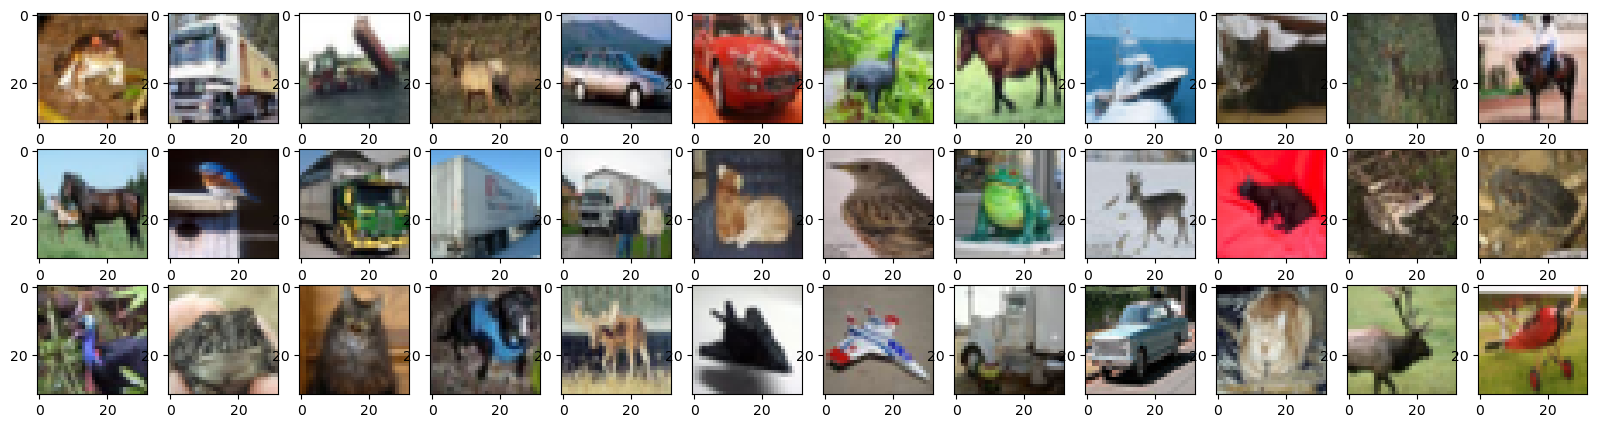

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
fig=plt.figure(figsize=(20,5))
for i in range(36):
    ax=fig.add_subplot(3,12,i+1)
    ax.imshow(Xtr[i])

In [24]:
Xtr[0].shape

(32, 32, 3)

In [30]:
Xtr=Xtr/255
Xte=Xte/255

In [31]:
from keras.utils import np_utils
from tensorflow import keras

num_classes=len(np.unique(ytr))
ytr=keras.utils.to_categorical(ytr,num_classes)
yte=keras.utils.to_categorical(yte,num_classes)

Xtr,Xval=Xtr[5000:],Xtr[:5000]
ytr,yval=ytr[5000:],ytr[:5000]

print('Xtr shape: ',Xtr.shape)
print(Xtr.shape[0],' Train samples')
print(Xte.shape[0],' Test samples')
print(Xval.shape[0],' Val samples')

Xtr shape:  (45000, 32, 32, 3)
45000  Train samples
10000  Test samples
5000  Val samples


In [48]:
from keras.models import Sequential
from keras.layers import Flatten,Dense,Conv2D,MaxPooling2D,Dropout
model=Sequential()
model.add(Conv2D(16,kernel_size=3,padding='same',activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(32,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(64,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 16, 16, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 8, 8, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 4, 4, 64)        

In [50]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [52]:
from keras.callbacks import ModelCheckpoint
checkpointer=ModelCheckpoint(filepath='model2.weights.best.hdf5',verbose=1,save_best_only=True)
hist=model.fit(Xtr,ytr,batch_size=32,epochs=5,validation_data=(Xval,yval),callbacks=[checkpointer],verbose=2,shuffle=True)

Epoch 1/5

Epoch 1: val_loss improved from inf to 1.24361, saving model to model2.weights.best.hdf5
1407/1407 - 19s - loss: 1.2286 - accuracy: 0.5615 - val_loss: 1.2436 - val_accuracy: 0.5498 - 19s/epoch - 14ms/step
Epoch 2/5

Epoch 2: val_loss improved from 1.24361 to 1.00978, saving model to model2.weights.best.hdf5
1407/1407 - 21s - loss: 1.0840 - accuracy: 0.6188 - val_loss: 1.0098 - val_accuracy: 0.6496 - 21s/epoch - 15ms/step
Epoch 3/5

Epoch 3: val_loss improved from 1.00978 to 0.89291, saving model to model2.weights.best.hdf5
1407/1407 - 20s - loss: 1.0015 - accuracy: 0.6500 - val_loss: 0.8929 - val_accuracy: 0.6992 - 20s/epoch - 14ms/step
Epoch 4/5

Epoch 4: val_loss did not improve from 0.89291
1407/1407 - 20s - loss: 0.9554 - accuracy: 0.6684 - val_loss: 0.9759 - val_accuracy: 0.6726 - 20s/epoch - 14ms/step
Epoch 5/5

Epoch 5: val_loss did not improve from 0.89291
1407/1407 - 20s - loss: 0.9255 - accuracy: 0.6788 - val_loss: 0.9732 - val_accuracy: 0.6698 - 20s/epoch - 14ms/s

In [53]:
yhat=model.predict(Xte)
cifar10_labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']


313/313 [==============================] - 1s 3ms/step


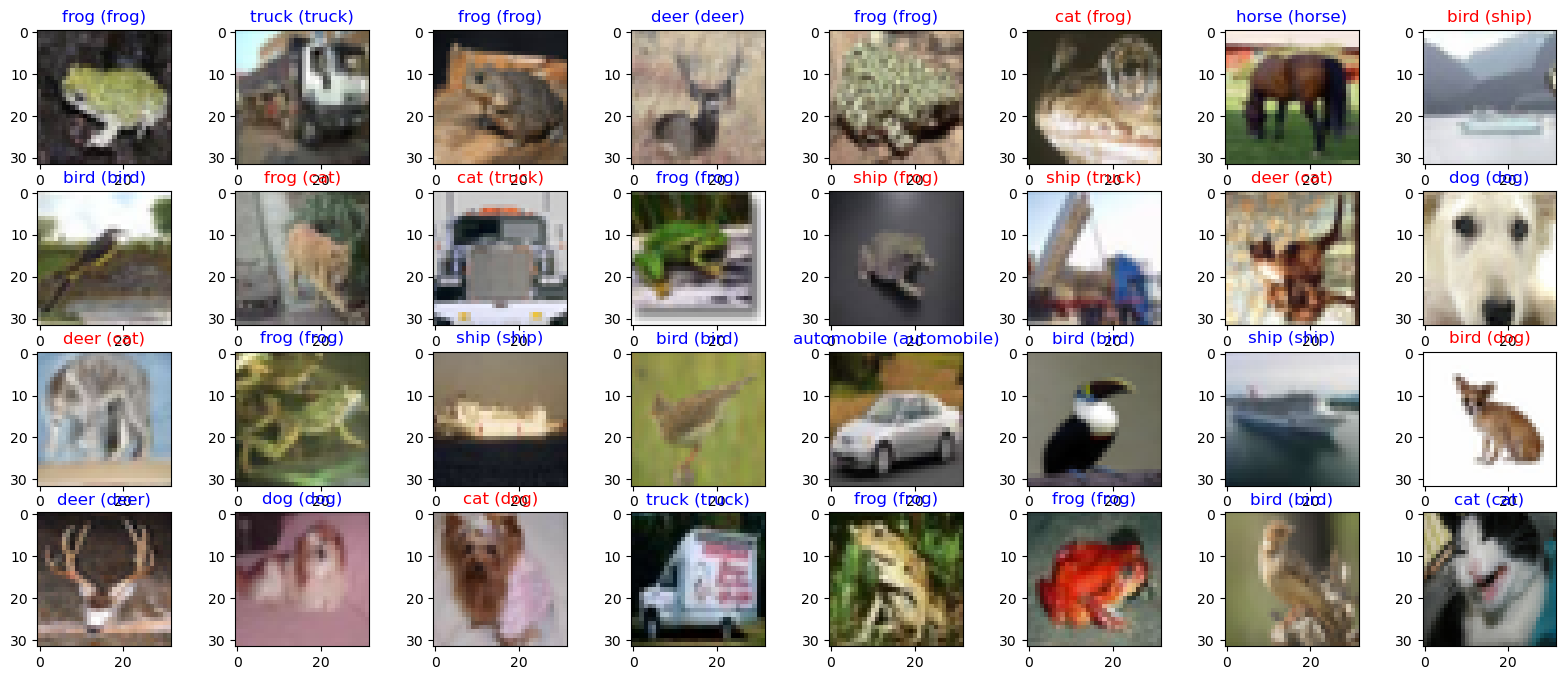

In [54]:
fig=plt.figure(figsize=(20,8))
for i,idx in enumerate(np.random.choice(Xte.shape[0],size=32,replace=False)):
    ax=fig.add_subplot(4,8,i+1)
    ax.imshow(np.squeeze(Xte[idx]))
    pred_idx=np.argmax(yhat[idx])
    true_idx=np.argmax(yte[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx],cifar10_labels[true_idx]),color=('blue' if pred_idx==true_idx else 'red'))

In [55]:
yhat[0]

array([0.00997934, 0.02160387, 0.0382698 , 0.46787524, 0.01808335,
       0.05291411, 0.25737447, 0.00074947, 0.10267504, 0.03047539],
      dtype=float32)

In [56]:
yte[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)